# ploting a sigmoid function

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid looks like 
    $S_{w,b}(x) =  \frac{1}{1+e^{-{wx+b}}}$ 

In [6]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [8]:
sigmoid(1,0.5,0)

0.6224593312018546

In [9]:
w = 0.9
b=0.1
X=np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [10]:
Y

array([1.36370327e-04, 1.63557591e-04, 1.96163940e-04, 2.35269063e-04,
       2.82167560e-04, 3.38411631e-04, 4.05862205e-04, 4.86750155e-04,
       5.83749582e-04, 7.00065487e-04, 8.39538625e-04, 1.00677082e-03,
       1.20727464e-03, 1.44765201e-03, 1.73580713e-03, 2.08119997e-03,
       2.49514769e-03, 2.99118223e-03, 3.58547383e-03, 4.29733104e-03,
       5.14978940e-03, 6.17030137e-03, 7.39154134e-03, 8.85233891e-03,
       1.05987527e-02, 1.26852942e-02, 1.51763055e-02, 1.81474856e-02,
       2.16875463e-02, 2.58999564e-02, 3.09047040e-02, 3.68399635e-02,
       4.38634985e-02, 5.21535631e-02, 6.19089754e-02, 7.33479467e-02,
       8.67051530e-02, 1.02226463e-01, 1.20160718e-01, 1.40748033e-01,
       1.64204313e-01, 1.90702102e-01, 2.20348548e-01, 2.53162097e-01,
       2.89050497e-01, 3.27793485e-01, 3.69033898e-01, 4.12280596e-01,
       4.56925222e-01, 5.02272712e-01, 5.47582842e-01, 5.92117819e-01,
       6.35189527e-01, 6.76200172e-01, 7.14671494e-01, 7.50260106e-01,
      

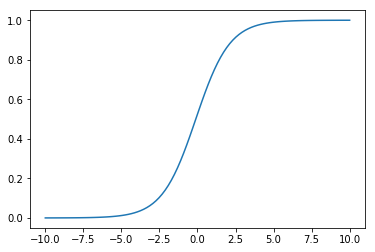

In [11]:
plt.plot(X,Y)

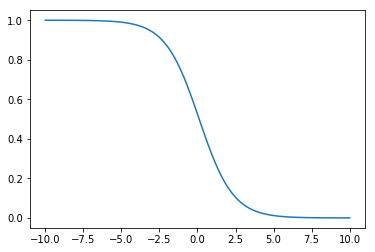

In [16]:
#w=-w
w=-0.9
Y=sigmoid(X,w,b)
plt.plot(X,Y)

# plotting a 3D sigmoid
#sigmoid looks like 
    $S_{w,b}(x) =  \frac{1}{1+e^{-{w_1x_1+ w_2x_2+b}}}$ 

In [19]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [24]:
!pip install mpl_toolkits
from mpl_toolkits import mplot3d

  ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
X1= np.linspace(-10,10,100)
X2 =  np.linspace(-10,10,100)

In [49]:
print(sigmoid_2d(1,0,0.5,0,0))
XX1,XX2 =  np.meshgrid(X1,X2)

0.6224593312018546


In [50]:
print(XX1.shape,XX2.shape)
w1=0.5
w2=0.5
b=0

(100, 100) (100, 100)


In [51]:
Y =  sigmoid_2d(XX1,XX2,w1,w2,b)

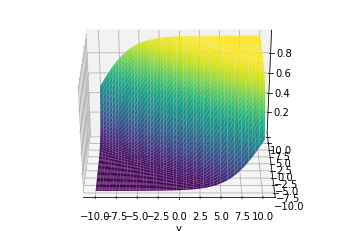

In [64]:
fig =  plt.figure()
ax  = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_xlabel('x2')
ax.set_xlabel('y')


#view_init function is used to view from which angle you are view it
ax.view_init(30,270)

# compute a loss for given dataset


In [65]:
w_unknown =  0.5
b_unknown =  0.25

X = np.random.random(25) * 20 - 10 
Y = sigmoid(X,w_unknown,b_unknown)

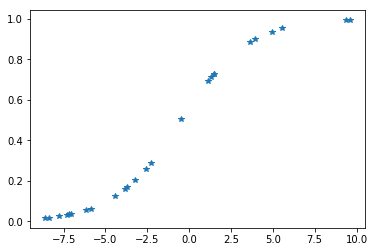

In [67]:
plt.plot(X,Y,'*')

In [72]:
W  = np.linspace(-1,1,100)
B  = np.linspace(-1,1,100)
WW,BB =  np.meshgrid(W,B)

In [77]:
def calculate_loss(X,Y,w_est, b_est):
    loss =0
    for x,y in zip(X,Y):
        loss  += y-sigmoid(x,w_est,b_est)**2
    return loss

In [80]:

Loss  = np.zeros(WW.shape)

for i in range(WW.shape[0]):
    for j in range(BB.shape[0]):
        Loss[i,j] =  calculate_loss(X,Y,WW[i][j],BB[i][j])

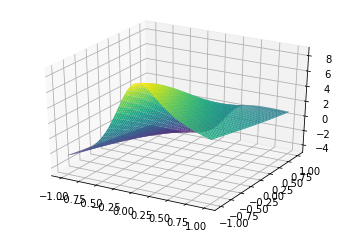

In [84]:
fig = plt.figure()
ax  = plt.axes(projection='3d') 
ax.plot_surface(WW,BB,Loss,cmap='viridis')

# class for sigmoid Neurons

In [23]:
class sigmoidNeurons:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    def fit(self,X,Y,epochs=1,learning_rate=1.0,initialise=True):
        #initialize w,b
        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b=0
        for i  in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w-=learning_rate*dw
            self.b-=learning_rate*db

# fit for toy data

In [24]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y=[1,1,1,0,0,0]

In [25]:
sn = sigmoidNeurons()
sn.fit(X,Y,1,0.25,True)

In [26]:
print(sn.w,"-----------",sn.b)

[[0.53119474 1.06163512]] ----------- [0.00614646]


In [ ]:
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1,X2)
    YY =np.zeros(XX1.shape)
    for i in range(X2.shape):
        for j in range(X1.size()):
            val = np.asarray([X1[j],X2[j]])
            YY[i,j] =  sn.sigmoid(sn.perceptron(val))
    ax = plt.subplot()

In [27]:
for i in range(10):
    print(sn.w," ----- ",sn.b)
    sn.fit(X,Y,1,0.25,False)

[[0.53119474 1.06163512]]  -----  [0.00614646]
[[0.54821194 1.00415896]]  -----  [0.0106965]
[[0.55815627 0.94037346]]  -----  [0.01426783]
[[0.56217882 0.8665161 ]]  -----  [0.01728506]
[[0.56061872 0.77694475]]  -----  [0.02006806]
[[0.55293603 0.66200387]]  -----  [0.02281797]
[[0.53687002 0.5032302 ]]  -----  [0.02520386]
[[0.50432523 0.26251407]]  -----  [0.02358049]
[[ 0.42272708 -0.12661261]]  -----  [-0.00439272]
[[ 0.29467709 -0.4677808 ]]  -----  [-0.06610796]
